In [4]:
import numpy as np
import random
import cv2
import os
from imutils import paths
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Activation, Flatten, Dense, Dropout,SimpleRNN
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
#binarize the labels
lb = LabelBinarizer()

import pandas as pd

data_files = ['cle_metadata_train.csv','cle_metadata_test.csv','hun_metadata_train.csv','hun_metadata_test.csv','swi_metadata_train.csv','swi_metadata_test.csv','vir_metadata_train.csv','vir_metadata_test.csv']

datasets = {}

for file in data_files:
    data = pd.read_csv('../TrainTestData/' + file)
    
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    
    Y_binary = Y.apply(lambda x: 1 if x > 0 else 0)
    
    # Extract the name from the file path
    name = file.split('.')[0]
    
    # Store the dataset components in a dictionary
    datasets[name] = {'X': X, 'Y': Y, 'Y_binary': Y_binary}

# Unpack the dictionary values in a loop
variables = ['cle', 'hun', 'swi', 'vir']
train_test = ['train', 'test']

for var in variables:
    for tt in train_test:
        X, Y, Y_binary = datasets[f'{var}_metadata_{tt}'].values()
        globals()[f'{var}_X_{tt}'] = X
        globals()[f'{var}_Y_{tt}'] = Y
        globals()[f'{var}_Y_{tt}_binary'] = Y_binary

In [18]:
X_test = pd.concat([cle_X_test,hun_X_test,swi_X_test,vir_X_test, swi_X_train])
Y_test = pd.concat([cle_Y_test_binary,hun_Y_test_binary,swi_Y_test_binary,vir_Y_test_binary,swi_Y_train_binary])

X_train = pd.concat([cle_X_train,hun_X_train,vir_X_train])
Y_train = pd.concat([cle_Y_train_binary,hun_Y_train_binary,vir_Y_train_binary])

# CNN

In [7]:
model = tf.keras.models.load_model('../Models/Meta_Only/Meta_CNN.h5')

In [16]:
Y_predictions = np.argmax(model.predict(X_test),axis = 1)

12/12 [==============================] - 0s 12ms/step


In [19]:
CNN_FL_pred = Y_predictions.copy()
CNN_FL_label = Y_test

In [20]:
import sklearn
from sklearn import metrics

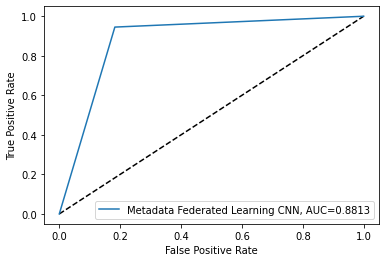

In [22]:
plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#fit logistic regression model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Metadata Federated Learning CNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

# CNN

In [23]:
Train = pd.read_csv('../TrainTestData/com_train.csv')
Test = pd.read_csv('../TrainTestData/com_train.csv')
    
X_train = Train.iloc[:,:-1]
Y_train = Train.iloc[:,-1]

X_test = Test.iloc[:,:-1]
Y_test = Test.iloc[:,-1]

#binarize the target
Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

# CNN
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(22,1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=20, batch_size=32)
Y_pred = model.predict(X_test).argmax(axis=1)

CNN_pred = Y_pred
CNN_label = Y_test_binary

Epoch 1/20
21/21 [==============================] - 1s 23ms/step - loss: 0.6269 - accuracy: 0.6568
Epoch 2/20
21/21 [==============================] - 1s 24ms/step - loss: 0.4936 - accuracy: 0.7671
Epoch 3/20
21/21 [==============================] - 1s 24ms/step - loss: 0.4643 - accuracy: 0.7904
Epoch 4/20
21/21 [==============================] - 1s 24ms/step - loss: 0.4605 - accuracy: 0.7919
Epoch 5/20
21/21 [==============================] - 1s 24ms/step - loss: 0.4268 - accuracy: 0.7966
Epoch 6/20
21/21 [==============================] - 0s 24ms/step - loss: 0.4082 - accuracy: 0.8199
Epoch 7/20
21/21 [==============================] - 0s 23ms/step - loss: 0.4352 - accuracy: 0.7966
Epoch 8/20
21/21 [==============================] - 0s 23ms/step - loss: 0.4014 - accuracy: 0.8261
Epoch 9/20
21/21 [==============================] - 0s 23ms/step - loss: 0.3960 - accuracy: 0.8075
Epoch 10/20
21/21 [==============================] - 0s 23ms/step - loss: 0.4055 - accuracy: 0.8292
Epoch 11/

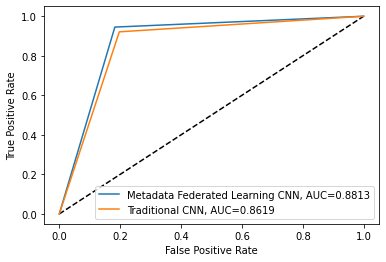

In [24]:
plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#FL CNN
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Metadata Federated Learning CNN, AUC="+str(auc))

#CNN
fpr, tpr, _ = metrics.roc_curve(CNN_label, CNN_pred)
auc = round(metrics.roc_auc_score(CNN_label, CNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional CNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

# RNN FL

In [26]:
#binarize the labels
lb = LabelBinarizer()

import pandas as pd

data_files = ['cle_metadata_train.csv','cle_metadata_test.csv','hun_metadata_train.csv','hun_metadata_test.csv','swi_metadata_train.csv','swi_metadata_test.csv','vir_metadata_train.csv','vir_metadata_test.csv']

datasets = {}

for file in data_files:
    data = pd.read_csv('../TrainTestData/' + file)
    
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    
    Y_binary = Y.apply(lambda x: 1 if x > 0 else 0)
    
    # Extract the name from the file path
    name = file.split('.')[0]
    
    # Store the dataset components in a dictionary
    datasets[name] = {'X': X, 'Y': Y, 'Y_binary': Y_binary}

# Unpack the dictionary values in a loop
variables = ['cle', 'hun', 'swi', 'vir']
train_test = ['train', 'test']

for var in variables:
    for tt in train_test:
        X, Y, Y_binary = datasets[f'{var}_metadata_{tt}'].values()
        globals()[f'{var}_X_{tt}'] = X
        globals()[f'{var}_Y_{tt}'] = Y
        globals()[f'{var}_Y_{tt}_binary'] = Y_binary
        
X_test = pd.concat([cle_X_test,hun_X_test,swi_X_test,vir_X_test, swi_X_train])
y_test = pd.concat([cle_Y_test_binary,hun_Y_test_binary,swi_Y_test_binary,vir_Y_test_binary,swi_Y_train_binary])

X_train = pd.concat([cle_X_train,hun_X_train,vir_X_train])
y_train = pd.concat([cle_Y_train_binary,hun_Y_train_binary,vir_Y_train_binary])

model = tf.keras.models.load_model('../Models/Meta_Only/Meta_RNN.h5')
        
Y_predictions = np.argmax(model.predict(X_test),axis = 1)

RNN_FL_pred = Y_predictions.copy()
RNN_FL_label = Y_test

12/12 [==============================] - 0s 9ms/step


In [27]:
from sklearn import metrics

ValueError: continuous format is not supported

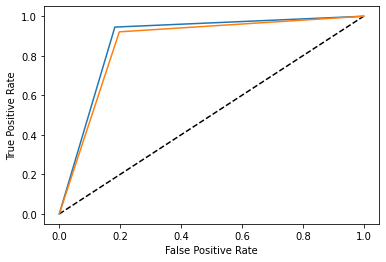

In [31]:
plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#FL CNN
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Federated Learning CNN, AUC="+str(auc))

#CNN
fpr, tpr, _ = metrics.roc_curve(CNN_label, CNN_pred)
auc = round(metrics.roc_auc_score(CNN_label, CNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional CNN, AUC="+str(auc))

#FL RNN
fpr, tpr, _ = metrics.roc_curve(RNN_FL_label, RNN_FL_pred)
auc = round(metrics.roc_auc_score(RNN_FL_label, RNN_FL_pred), 4)
plt.plot(fpr,tpr,label="Federated Learning RNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

# RNN

In [ ]:
#Split the data
Train = pd.read_csv('../TrainTestData/com_train.csv')
Test = pd.read_csv('../TrainTestData/com_test.csv')
    
X_train = Train.iloc[:,:-1]
Y_train = Train.iloc[:,-1]

X_test = Test.iloc[:,:-1]
Y_test = Test.iloc[:,-1]

#binarize the target
Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

# define the model architecture
model = Sequential()
model.add(SimpleRNN(units=22, return_sequences=True, input_shape=(22, 1)))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=16))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=10, batch_size=32)
Y_pred = model.predict(X_test).argmax(axis=1)

RNN_pred = Y_pred
RNN_label = Y_test_binary

In [ ]:
plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#FL CNN
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Federated Learning CNN, AUC="+str(auc))

#CNN
fpr, tpr, _ = metrics.roc_curve(CNN_label, CNN_pred)
auc = round(metrics.roc_auc_score(CNN_label, CNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional CNN, AUC="+str(auc))

#FL RNN
fpr, tpr, _ = metrics.roc_curve(RNN_FL_label, RNN_FL_pred)
auc = round(metrics.roc_auc_score(RNN_FL_label, RNN_FL_pred), 4)
plt.plot(fpr,tpr,label="Federated Learning RNN, AUC="+str(auc))

#RNN
fpr, tpr, _ = metrics.roc_curve(RNN_label, RNN_pred)
auc = round(metrics.roc_auc_score(RNN_label, RNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional RNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

# ANN FL

In [ ]:
#binarize the labels
lb = LabelBinarizer()

import pandas as pd

data_files = ['cle_train.csv','cle_test.csv','hun_train.csv','hun_test.csv','swi_train.csv','swi_test.csv','vir_train.csv','vir_test.csv']

datasets = {}

for file in data_files:
    data = pd.read_csv('../TrainTestData/' + file)
    
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    
    Y_binary = Y.apply(lambda x: 1 if x > 0 else 0)
    
    # Extract the name from the file path
    name = file.split('.')[0]
    
    # Store the dataset components in a dictionary
    datasets[name] = {'X': X, 'Y': Y, 'Y_binary': Y_binary}

# Unpack the dictionary values in a loop
variables = ['cle', 'hun', 'swi', 'vir']
train_test = ['train', 'test']

for var in variables:
    for tt in train_test:
        X, Y, Y_binary = datasets[f'{var}_{tt}'].values()
        globals()[f'{var}_X_{tt}'] = X
        globals()[f'{var}_Y_{tt}'] = Y
        globals()[f'{var}_Y_{tt}_binary'] = Y_binary
        
X_test = pd.concat([cle_X_test,hun_X_test,swi_X_test,vir_X_test, swi_X_train])
y_test = pd.concat([cle_Y_test_binary,hun_Y_test_binary,swi_Y_test_binary,vir_Y_test_binary,swi_Y_train_binary])

X_train = pd.concat([cle_X_train,hun_X_train,vir_X_train])
y_train = pd.concat([cle_Y_train_binary,hun_Y_train_binary,vir_Y_train_binary])

class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(200, input_shape=(shape,)))
        model.add(Activation("relu"))
        model.add(Dense(200))
        model.add(Activation("relu"))
        model.add(Dense(classes))
        model.add(Activation("sigmoid"))
        return model

#create clients
clients = create_clients()

#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

comms_round = 100
    
#create optimizer
lr = 0.01 
loss='sparse_categorical_crossentropy'
metrics = ['accuracy']
optimizer = tf.keras.optimizers.legacy.SGD(lr=lr, decay=lr / comms_round, momentum=0.9) 

#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build(22, 2)
        
#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build(22, 2)
        local_model.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        #set local model weight to the weight of the global model
        local_model.set_weights(global_weights)
        
        #fit local model with client's data
        local_model.fit(clients_batched[client], epochs=1, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    
    #update global model 
    global_model.set_weights(average_weights)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        global_acc, global_loss = test_model(X_test, Y_test, global_model, comm_round)
        SGD_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(y_train)).batch(250)
        smlp_SGD = CNN()
        SGD_model = smlp_SGD.build(22, 2) 

        SGD_model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

# fit the SGD training data to model
_ = SGD_model.fit(SGD_dataset, epochs=100, verbose=0)

#test the SGD global model and print out metrics
for(X_test, Y_test) in test_batched:
        SGD_acc, SGD_loss = test_model(X_test, Y_test, SGD_model, 1)
        
Y_predictions = np.argmax(SGD_model.predict(X_test),axis = 1)

ANN_FL_pred = Y_predictions.copy()
ANN_FL_label = Y_test

In [ ]:
from sklearn import metrics

plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#FL CNN
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Federated Learning CNN, AUC="+str(auc))

#CNN
fpr, tpr, _ = metrics.roc_curve(CNN_label, CNN_pred)
auc = round(metrics.roc_auc_score(CNN_label, CNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional CNN, AUC="+str(auc))

#FL RNN
fpr, tpr, _ = metrics.roc_curve(RNN_FL_label, RNN_FL_pred)
auc = round(metrics.roc_auc_score(RNN_FL_label, RNN_FL_pred), 4)
plt.plot(fpr,tpr,label="Federated Learning RNN, AUC="+str(auc))

#RNN
fpr, tpr, _ = metrics.roc_curve(RNN_label, RNN_pred)
auc = round(metrics.roc_auc_score(RNN_label, RNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional RNN, AUC="+str(auc))

#FL ANN
fpr, tpr, _ = metrics.roc_curve(ANN_FL_label, ANN_FL_pred)
auc = round(metrics.roc_auc_score(ANN_FL_label, ANN_FL_pred), 4)
plt.plot(fpr,tpr,label="Traditional RNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()

# ANN

In [ ]:
Train = pd.read_csv('../TrainTestData/com_train.csv')
Test = pd.read_csv('../TrainTestData/com_test.csv')
    
X_train = Train.iloc[:,:-1]
Y_train = Train.iloc[:,-1]

X_test = Test.iloc[:,:-1]
Y_test = Test.iloc[:,-1]

#binarize the target
Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

# define the model architecture
clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes=(150))
    
clf.fit(X_train, Y_train_binary)
Y_pred = clf.predict(X_test)

ANN_pred = Y_pred
ANN_label = Y_test_binary

In [ ]:
from sklearn import metrics

plt.figure(0).clf()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
    
#FL CNN
fpr, tpr, _ = metrics.roc_curve(CNN_FL_label, CNN_FL_pred)
auc = round(metrics.roc_auc_score(CNN_FL_label, CNN_FL_pred), 4)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr,tpr,label="Federated Learning CNN, AUC="+str(auc))

#CNN
fpr, tpr, _ = metrics.roc_curve(CNN_label, CNN_pred)
auc = round(metrics.roc_auc_score(CNN_label, CNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional CNN, AUC="+str(auc))

#FL RNN
fpr, tpr, _ = metrics.roc_curve(RNN_FL_label, RNN_FL_pred)
auc = round(metrics.roc_auc_score(RNN_FL_label, RNN_FL_pred), 4)
plt.plot(fpr,tpr,label="Federated Learning RNN, AUC="+str(auc))

#RNN
fpr, tpr, _ = metrics.roc_curve(RNN_label, RNN_pred)
auc = round(metrics.roc_auc_score(RNN_label, RNN_pred), 4)
plt.plot(fpr,tpr,label="Traditional RNN, AUC="+str(auc))

#FL ANN
fpr, tpr, _ = metrics.roc_curve(ANN_FL_label, ANN_FL_pred)
auc = round(metrics.roc_auc_score(ANN_FL_label, ANN_FL_pred), 4)
plt.plot(fpr,tpr,label="Federated Learning RNN, AUC="+str(auc))

#=ANN
fpr, tpr, _ = metrics.roc_curve(ANN_label, ANN_pred)
auc = round(metrics.roc_auc_score(ANN_label, ANN_pred), 4)
plt.plot(fpr,tpr,label="Traditional RNN, AUC="+str(auc))

#add legend
plt.legend()
plt.show()